# It's my project, where i will discover the principle, that called  least squares in the econometry.

## Here i will be work with the book: "378_1- Эконометрика. Кн.1. Ч.1,2_Носко В.П_2011 -672с". 
I will discover different formulas and examples from it.
So, let's start with the most popular formula, that used to estimates the coefficients of linear model.

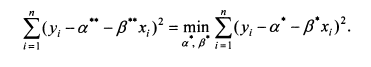

It's the formula, that called LEAST SQUARES ESTIMATES. 
Okay, it's clear, but where is it from? What mathematical principals are used in it?

In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
x_avg =  6.576470588235295 y_avg = 3.11764705882353
st_dev_x =  0.4161271016238697 st_dev_y = 0.1131110854295848


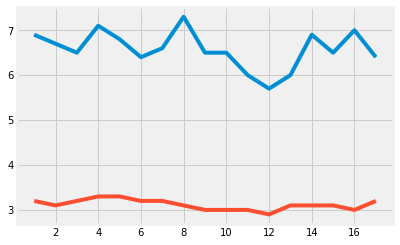

In [2]:
from numpy import array
data_time = [ i*1 for i in range(1,18)]
print (data_time)
y=array([3.2, 3.1, 3.2, 3.3, 3.3, 3.2, 3.2, 3.1, 3.0, 3.0, 3.0, 2.9, 3.1, 3.1, 3.1, 3.0, 3.2])
x=array([6.9, 6.7, 6.5, 7.1, 6.8, 6.4, 6.6, 7.3, 6.5, 6.5, 6.0, 5.7, 6.0, 6.9, 6.5, 7.0, 6.4])
n = len(x)
x_avg = 1 / len(x) * sum(x)
y_avg = 1 / len(y) * sum(y)
var_x = 1 / (n-1) * sum((x-x_avg) ** 2)
var_y = 1 / (n-1) * sum((y-y_avg) ** 2)
st_dev_x = var_x ** (1/2)
st_dev_y = var_y ** (1/2)
print ('x_avg = ',x_avg, "y_avg =", y_avg) # сходимся с учебником
print ('st_dev_x = ',st_dev_x, "st_dev_y =", st_dev_y) # сходимся с учебником
plt.plot(data_time, x)
plt.plot(data_time, y)

### Итак мы видим, что средний уровень безработицы среди цветного населения больше, чем среди белого
Таже среди цветного населения куда выше вариабельность уровня безработицы

Идём дальше, теперь построим корреляционное поле - correlation diagram

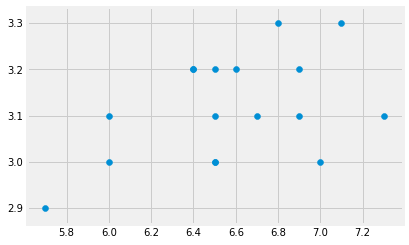

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
# fig, ax = plt.subplots()
# ax.scatter(x, y)

Okay, here we can see the elongation (вытянутость) нашего облака точек. 
We can conclude, that there are some relationship between this variables.

Let's find the sample correlation coefficient r(xy), but at first we should use the sample covariance.

In [4]:
cov_x_y = 1 / (n - 1) * sum( (x - x_avg) * (y-y_avg) )
# cov_x_y
r_x_y = cov_x_y / (var_x ** (1/2) * var_y ** (1/2) ) 
r_x_y

0.46084187623073464

# Discover Ordinary Least Squares
## Сейчас рассмотрю пример, когда существует прямолинейный характер взаимосвязи между факторами

##Будем использовать следующую линейную модель:
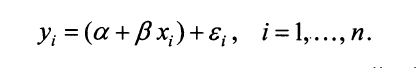

где a - intercept (точка пересечения) and b is slope (наклон)
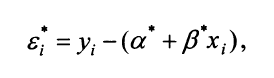
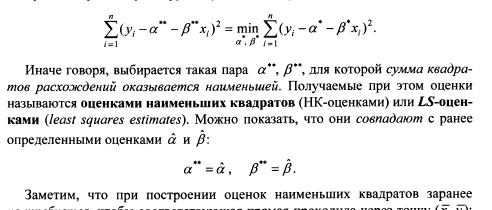

## Okay, i will use these formulas to compute intercept and slope for the model with black and white people
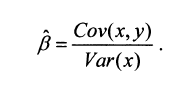
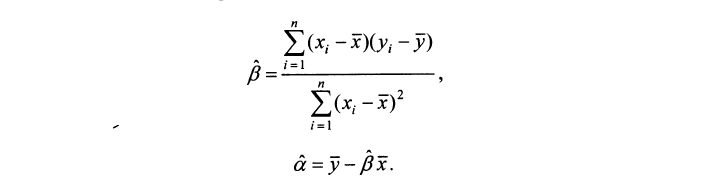

Slope coefficent is 0.12526539278131632
Intercept coefficent is 2.2938428874734607
Model will be: y =  2.2938428874734607  +  0.12526539278131632 *x
[3.1581740976645434, 3.13312101910828, 3.108067940552017, 3.1832271762208064, 3.1456475583864116]


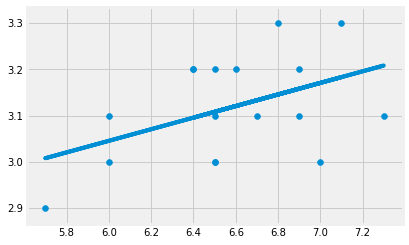

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

y_lst =np.array([3.2, 3.1, 3.2, 3.3, 3.3, 3.2, 3.2, 3.1, 3.0, 3.0, 3.0, 2.9, 3.1, 3.1, 3.1, 3.0, 3.2])
x_lst =np.array([6.9, 6.7, 6.5, 7.1, 6.8, 6.4, 6.6, 7.3, 6.5, 6.5, 6.0, 5.7, 6.0, 6.9, 6.5, 7.0, 6.4])
slope_coef = np.sum((x_lst-np.mean(x_lst))*(y_lst-np.mean(y_lst)))/np.sum((x_lst-np.mean(x_lst))**2)
# slope_coef_2 = np.sum((x-np.mean(x)))
print ('Slope coefficent is', slope_coef)
# print ('Slope coefficent 2 is', slope_coef_2)
intercept_coef = np.mean (y_lst) - np.mean(x_lst) * slope_coef
print ('Intercept coefficent is', intercept_coef)
print ('Model will be: y = ',intercept_coef,' + ',slope_coef,'*x')

def f(intercept, slope, x):
    return intercept_coef + slope_coef * x

plt.scatter(x_lst, y_lst)
plt.plot(x_lst, f(intercept_coef, slope_coef, x_lst))
# All cool, so we have such linear model. Let's take a look on it in graphic.
y_estimated = [f(intercept_coef, slope_coef, x) for x in x_lst]
print (y_estimated[:5])

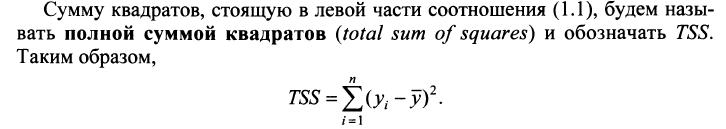

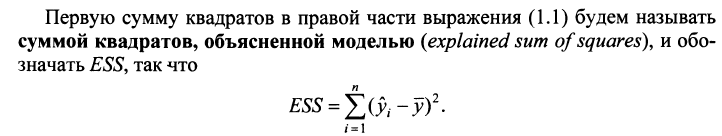
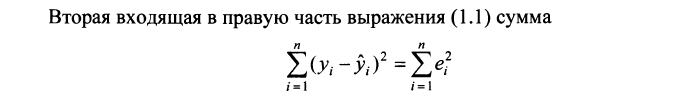
## Called  residual sum of squares

In [17]:
TSS = np.sum(y-np.mean(y))
ESS = np.sum(y_estimated - np.mean(y))
if np.sum(y_lst - y_estimated) == TSS - ESS:
    print ('Верное равенство, всё правильно получено')
    print ('RSS = ', np.sum(y_lst - y_estimated))
    print ('TSS = ', TSS)

Верное равенство, всё правильно получено
RSS =  4.440892098500626e-15
TSS =  4.440892098500626e-16


## Приводится объяснение тому, что такое ANOVA (дисперсионный) анализ
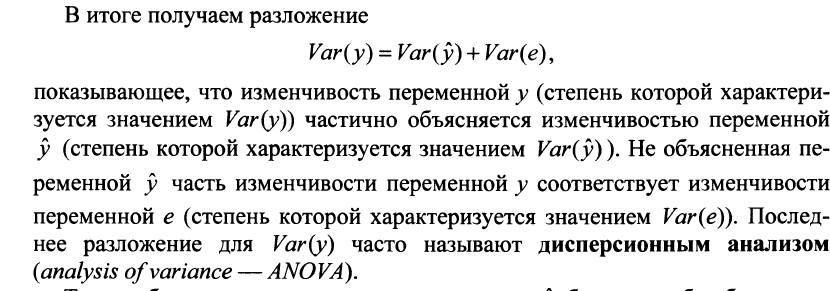

20% отклонение